In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.table import Table

In [2]:
fits1 = '/Users/samquist/Documents/AstroData/kepler_dr2_1arcsec.fits'

In [3]:
data = Table.read(fits1, format='fits')
color = data.to_pandas()

txt1 = '/Users/samquist/Documents/AstroData/Table_Periodic.txt'
prot = pd.read_csv(txt1)
md = pd.merge(prot, color, right_on='kepid', left_on='KID')
#I don't understand what all the [ok] criteria you used were


ok = np.where(np.isfinite(md[u'parallax']) & # this is basically the same as the TGAS file...
              (md[u'parallax_error'] < 0.1) &
              (md[u'r_modality_flag'] == 1) & 
              (md[u'r_result_flag'] == 1) &
              np.isfinite(md[u'bp_rp']) & 
              (md[u'phot_bp_mean_flux_error']/md[u'phot_bp_mean_flux'] < 0.01) & 
              (md[u'phot_rp_mean_flux_error']/md[u'phot_rp_mean_flux'] < 0.01) & 
              (md[u'phot_g_mean_flux_error']/md[u'phot_g_mean_flux'] < 0.01))[0]

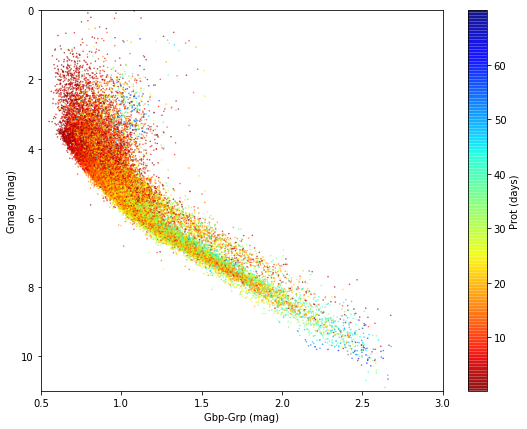

In [4]:
cm = plt.cm.jet_r

fig, ax1 = plt.subplots(figsize = (9,7))


plt.scatter(md['bp_rp'].values[ok], 
            md['phot_g_mean_mag'].values[ok] - 5. * np.log10(md['r_est']).values[ok] + 5, 
            c=(md['Prot'].values[ok]), alpha = .7, s=.3, cmap=cm)

plt.xlim(.5,3)
plt.xlabel('Gbp-Grp (mag)')
plt.ylim(11,0)
plt.ylabel('Gmag (mag)')
cb = plt.colorbar()
cb.set_label('Prot (days)')


In [5]:
Inames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')


Ifile = '/Users/samquist/Downloads/MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'

mist = pd.read_table(Ifile, delim_whitespace=True, comment='#', names=Inames)


mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.) & 
                    (mist['Gaia_G_DR2Rev'] > 2))[0][::-1]
mist_ms2 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] > 8.11) & (mist['log10_isochrone_age_yr'] < 8.2))[0][::-1]


In [6]:
Mg_iso_mist = np.interp(md[u'bp_rp'].values[ok], mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
                        mist['Gaia_G_DR2Rev'].values[mist_ms1])

delta_mag_mist = Mg_iso_mist - (md[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(md[u'r_est'].values[ok])  + 5)


dok = np.isfinite(delta_mag_mist)
dmag_lims = [[-0.1, 0.4], [0.5, 1.]] 

msok = np.where((delta_mag_mist >= dmag_lims[0][0]) & 
                (delta_mag_mist <= dmag_lims[0][1]))[0]

bsok = np.where((delta_mag_mist)>= dmag_lims[1][1])[0]



Text(0,0.5,'Gmag (mag)')

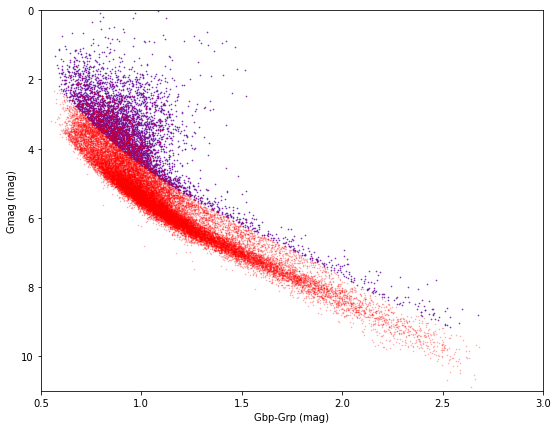

In [17]:
cm = plt.cm.jet_r

fig, ax1 = plt.subplots(figsize = (9,7))


plt.scatter(md['bp_rp'].values[ok][bsok], 
            md['phot_g_mean_mag'].values[ok][bsok] - 5. * np.log10(md['r_est']).values[ok][bsok] + 5, alpha = .7, s=.3, color='b')
            #c=(md['bp_rp'].values[ok][bsok]), alpha = .7, s=.3, color='b')

    
plt.scatter(md['bp_rp'].values[ok], 
            md['phot_g_mean_mag'].values[ok] - 5. * np.log10(md['r_est']).values[ok] + 5, alpha=.3,s=.3,color='r')
            #c=(md['Prot'].values[ok]), alpha = .7, s=.3, cmap=cm)

    
    
plt.xlim(.5,3)
plt.xlabel('Gbp-Grp (mag)')
plt.ylim(11,0)
plt.ylabel('Gmag (mag)')
#cb = plt.colorbar()
#cb.set_label('Prot (days)')
